This notebook contains implementation of SegNet using Pytorch.
You can also use it with vgg pretrained weights. <br>
paper : https://arxiv.org/pdf/1511.00561.pdf


In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import torchvision.models as models

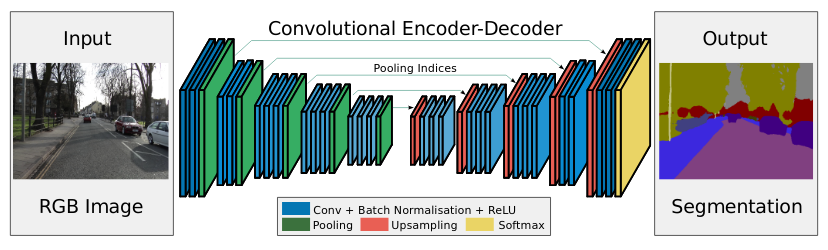

In [5]:
def double_block(in_ch,out_ch,activation=True):
    out = [
        nn.Conv2d(in_channels=in_ch,out_channels=out_ch,kernel_size=(3,3),padding=1),
        nn.BatchNorm2d(num_features=out_ch),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=out_ch,out_channels=out_ch,kernel_size=(3,3),padding=1),
        nn.BatchNorm2d(num_features=out_ch)]

    if activation == True:
      out.append(nn.ReLU(inplace=True))

    return nn.Sequential(*out)

def triple_block(in_ch,out_ch):
    out = nn.Sequential(
        nn.Conv2d(in_channels=in_ch,out_channels=out_ch,kernel_size=(3,3),padding=1),
        nn.BatchNorm2d(num_features=out_ch),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=out_ch,out_channels=out_ch,kernel_size=(3,3),padding=1),
        nn.BatchNorm2d(num_features=out_ch),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=out_ch,out_channels=out_ch,kernel_size=(3,3),padding=1),
        nn.BatchNorm2d(num_features=out_ch),
        nn.ReLU(inplace=True)
         )
    return out




class SegNet(nn.Module):
    def __init__(self,pretrained=False):
         super(SegNet, self).__init__()
            
         self.eblock1 = double_block(3,64)
         self.eblock2 = double_block(64,128)
         self.eblock3 = triple_block(128,256)
         self.eblock4 = triple_block(256,512)
         self.eblock5 = triple_block(512,512)
         if pretrained:
           self.vgg16 = models.vgg16_bn(pretrained=True)
           self.init_weights()

         self.dblock1 = triple_block(512,512)
         self.dblock2 = triple_block(512,256)
         self.dblock3 = triple_block(256,128)
         self.dblock4 = double_block(128,64)
         self.dblock5 = double_block(64,1,activation=False)
         self.maxpool = nn.MaxPool2d(kernel_size=2,stride=2,return_indices=True)

    def forward(self, x):
        # encoder
        dim0 = x.size()
        x = self.eblock1(x)
        x, idx1 = self.maxpool(x)
        dim1 = x.size()
        x = self.eblock2(x)
        x, idx2 = self.maxpool(x)
        dim2 = x.size()
        x = self.eblock3(x)
        x, idx3 = self.maxpool(x)
        dim3 = x.size()
        x = self.eblock4(x)
        x, idx4 = self.maxpool(x)
        dim4 = x.size()
        x = self.eblock5(x)
        x, idx5 = self.maxpool(x)
      

        x = F.max_unpool2d(x, idx5, kernel_size=2, stride=2, output_size=dim4) 
        x = self.dblock1(x)
        x = F.max_unpool2d(x, idx4, kernel_size=2, stride=2, output_size=dim3)
        x = self.dblock2(x)
        x = F.max_unpool2d(x, idx3, kernel_size=2, stride=2, output_size=dim2)
        x = self.dblock3(x)
        x = F.max_unpool2d(x, idx2, kernel_size=2, stride=2, output_size=dim1)
        x = self.dblock4(x)
        x = F.max_unpool2d(x, idx1, kernel_size=2, stride=2, output_size=dim0)
        x = self.dblock5(x)

        return x
    
    def init_weights(self):
       
        self.eblock1[0].weight.data = self.vgg16.features[0].weight.data
        self.eblock1[1].weight.data = self.vgg16.features[1].weight.data
        self.eblock1[3].weight.data = self.vgg16.features[3].weight.data
        self.eblock1[4].weight.data = self.vgg16.features[4].weight.data
        self.eblock1[0].bias.data = self.vgg16.features[0].bias.data
        self.eblock1[1].bias.data = self.vgg16.features[1].bias.data
        self.eblock1[3].bias.data = self.vgg16.features[3].bias.data
        self.eblock1[4].bias.data = self.vgg16.features[4].bias.data

        self.eblock2[0].weight.data = self.vgg16.features[7].weight.data
        self.eblock2[1].weight.data = self.vgg16.features[8].weight.data
        self.eblock2[3].weight.data = self.vgg16.features[10].weight.data
        self.eblock2[4].weight.data = self.vgg16.features[11].weight.data
        self.eblock2[0].bias.data = self.vgg16.features[7].bias.data
        self.eblock2[1].bias.data = self.vgg16.features[8].bias.data
        self.eblock2[3].bias.data = self.vgg16.features[10].bias.data
        self.eblock2[4].bias.data = self.vgg16.features[11].bias.data


        self.eblock3[0].weight.data = self.vgg16.features[14].weight.data
        self.eblock3[1].weight.data = self.vgg16.features[15].weight.data
        self.eblock3[3].weight.data = self.vgg16.features[17].weight.data
        self.eblock3[4].weight.data = self.vgg16.features[18].weight.data
        self.eblock3[6].weight.data = self.vgg16.features[20].weight.data
        self.eblock3[7].weight.data = self.vgg16.features[21].weight.data
        self.eblock3[0].bias.data = self.vgg16.features[14].bias.data
        self.eblock3[1].bias.data = self.vgg16.features[15].bias.data
        self.eblock3[3].bias.data = self.vgg16.features[17].bias.data
        self.eblock3[4].bias.data = self.vgg16.features[18].bias.data
        self.eblock3[6].bias.data = self.vgg16.features[20].bias.data
        self.eblock3[7].bias.data = self.vgg16.features[21].bias.data


        self.eblock4[0].weight.data = self.vgg16.features[24].weight.data
        self.eblock4[1].weight.data = self.vgg16.features[25].weight.data
        self.eblock4[3].weight.data = self.vgg16.features[27].weight.data
        self.eblock4[4].weight.data = self.vgg16.features[28].weight.data
        self.eblock4[6].weight.data = self.vgg16.features[30].weight.data
        self.eblock4[7].weight.data = self.vgg16.features[31].weight.data
        self.eblock4[0].bias.data = self.vgg16.features[24].bias.data
        self.eblock4[1].bias.data = self.vgg16.features[25].bias.data
        self.eblock4[3].bias.data = self.vgg16.features[27].bias.data
        self.eblock4[4].bias.data = self.vgg16.features[28].bias.data
        self.eblock4[6].bias.data = self.vgg16.features[30].bias.data
        self.eblock4[7].bias.data = self.vgg16.features[31].bias.data


        self.eblock5[0].weight.data = self.vgg16.features[34].weight.data
        self.eblock5[1].weight.data = self.vgg16.features[35].weight.data
        self.eblock5[3].weight.data = self.vgg16.features[37].weight.data
        self.eblock5[4].weight.data = self.vgg16.features[38].weight.data
        self.eblock5[6].weight.data = self.vgg16.features[40].weight.data
        self.eblock5[7].weight.data = self.vgg16.features[41].weight.data
        self.eblock5[0].bias.data = self.vgg16.features[34].bias.data
        self.eblock5[1].bias.data = self.vgg16.features[35].bias.data
        self.eblock5[3].bias.data = self.vgg16.features[37].bias.data
        self.eblock5[4].bias.data = self.vgg16.features[38].bias.data
        self.eblock5[6].bias.data = self.vgg16.features[40].bias.data
        self.eblock5[7].bias.data = self.vgg16.features[41].bias.data



        



### Usage

In [6]:
model = SegNet(pretrained=True)
model

SegNet(
  (eblock1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (eblock2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (eblock3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=Tr

In [ ]:
# model = SegNet(pretrained=False)


In [58]:
img = torch.randint(size=(1,3,256,256),low=0,high=255).float()
img.shape

torch.Size([1, 3, 256, 256])

In [59]:
out = model(img)
out.shape

torch.Size([1, 1, 256, 256])